In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

TARGET_COL = 'Fertilizer Name'

data_train.sample(5)

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
402082,402082,26,61,65,Black,Paddy,36,2,21,17-17-17
218715,218715,27,62,37,Red,Ground Nuts,4,6,41,Urea
272368,272368,36,71,38,Red,Barley,37,8,34,20-20
672940,672940,38,62,44,Sandy,Millets,22,8,35,Urea
609768,609768,34,57,44,Sandy,Tobacco,28,9,2,17-17-17


### from looking at the data tab on kaggle:
* no missing data, at all
* typo "Temparature" instead of "Temperature"

* translate fertilizer names to NPK components (+ micros)?

In [2]:
def make_integer_hist_plot(df, col):
    low = df[col].min()
    high = df[col].max()
    bins = np.linspace(low-0.5, high+0.5, round(high-low+2))
    sns.histplot(data=df, x=col, hue=TARGET_COL, bins=bins, element="poly")

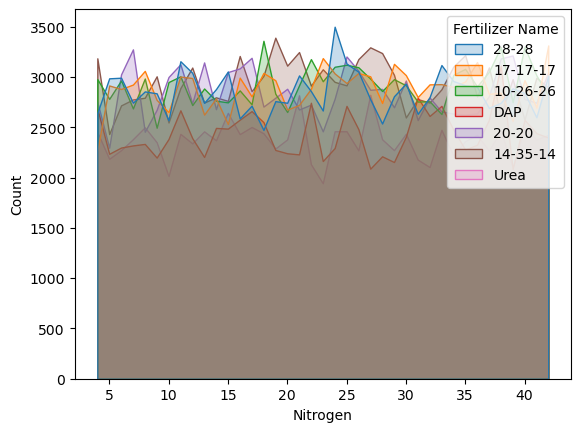

In [3]:
make_integer_hist_plot(data_train, 'Nitrogen')

In [4]:
def cross_tab_associations(df, col_1, col_2):
    contingency = pd.crosstab(df[col_1], df[col_2], normalize='index')
    hm = sns.heatmap(contingency, annot=True, cmap='Blues', cbar=True)
    plt.xlabel(f'{col_2}')
    plt.ylabel(f'{col_1}')

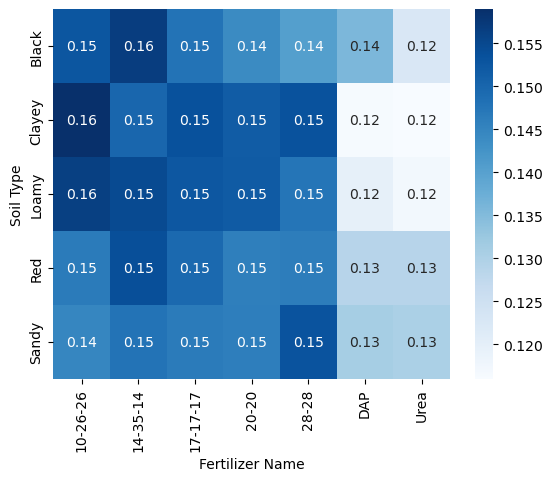

In [5]:
cross_tab_associations(data_train, 'Soil Type', TARGET_COL)

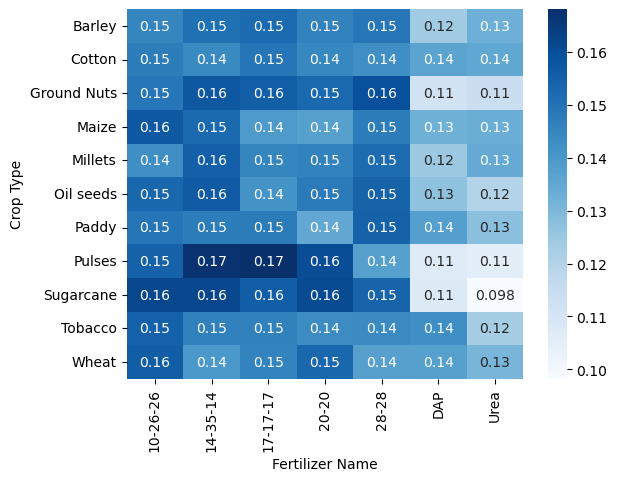

In [6]:
cross_tab_associations(data_train, 'Crop Type', TARGET_COL)

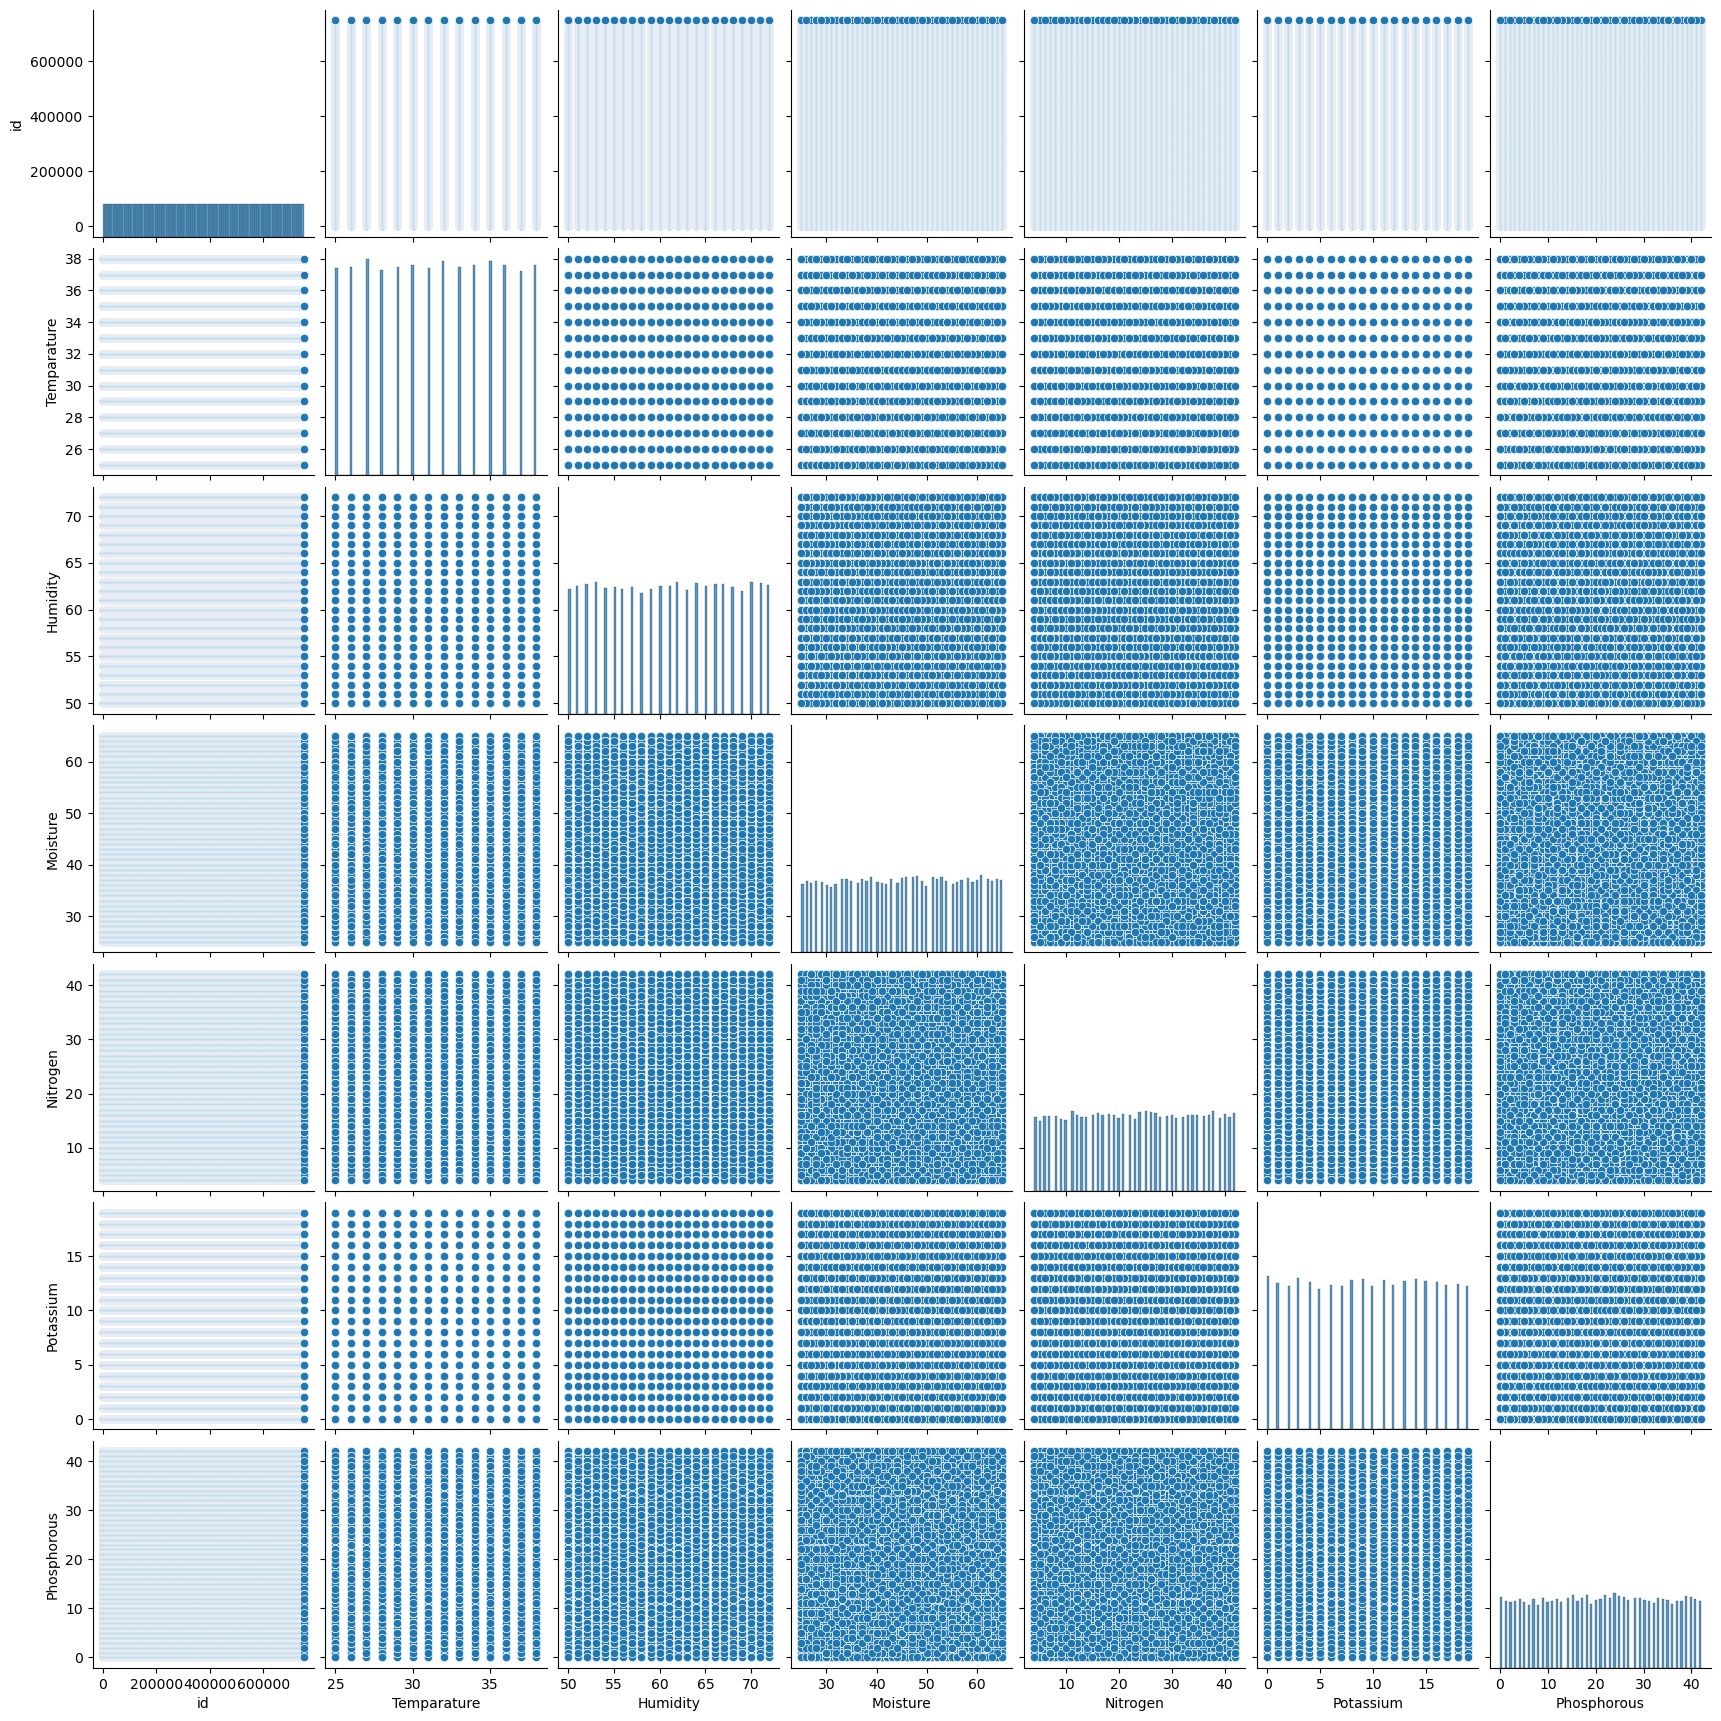

In [7]:
sns.pairplot(data_train)

In [8]:
def add_fertilizer_components(pd_df: pd.DataFrame) -> pd.DataFrame:
    fertilizer_compositions = {'28-28': {'N': 28, 'P2O5': 28, 'K2O': 0},
                               '17-17-17': {'N': 17, 'P2O5': 17, 'K2O': 17},
                               '10-26-26': {'N': 10, 'P2O5': 26, 'K2O': 26},
                               'DAP': {'N': 18, 'P2O5': 46, 'K2O': 0},
                               '20-20': {'N': 20, 'P2O5': 20, 'K2O': 0},
                               '14-35-14': {'N': 14, 'P2O5': 35, 'K2O': 14},
                               'Urea': {'N': 46, 'P2O5': 0, 'K2O': 0}
                               }
    
    #pd_df['N'] = pd_df['fertilizer'].map(lambda x: fertilizer_compositions.get(x, {}).get('N', None))
    #pd_df['P2O5'] = pd_df['fertilizer'].map(lambda x: fertilizer_compositions.get(x, {}).get('P2O5', None))
    #pd_df['K2O'] = pd_df['fertilizer'].map(lambda x: fertilizer_compositions.get(x, {}).get('K2O', None))

    composition_df = pd.DataFrame.from_dict(fertilizer_compositions, orient='index').reset_index()
    composition_df.rename(columns={'index': 'Fertilizer Name'}, inplace=True)

    # Merge your large dataframe with the compositions on 'fertilizer' column
    pd_df = pd_df.merge(composition_df, on='Fertilizer Name', how='left')

    return pd_df

In [9]:
data_train = add_fertilizer_components(data_train)
data_train.sample(5)

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,N,P2O5,K2O
648878,648878,38,59,65,Loamy,Millets,14,16,39,17-17-17,17,17,17
489477,489477,36,67,43,Loamy,Barley,7,16,19,DAP,18,46,0
312612,312612,25,62,47,Sandy,Tobacco,34,11,21,14-35-14,14,35,14
192047,192047,29,60,28,Loamy,Pulses,20,5,29,14-35-14,14,35,14
483662,483662,26,61,63,Clayey,Paddy,20,6,19,20-20,20,20,0


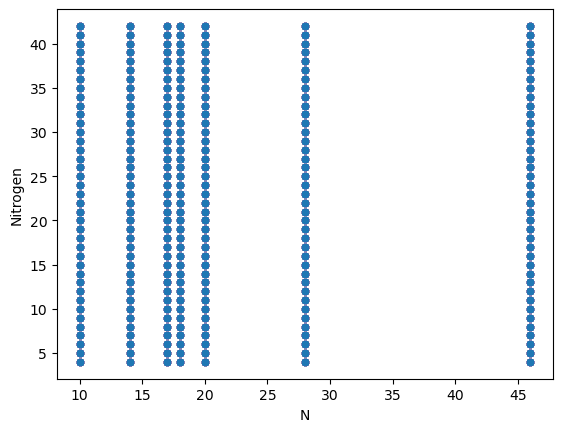

In [10]:
sc = sns.scatterplot(data=data_train, x='N', y='Nitrogen', alpha=0.01)

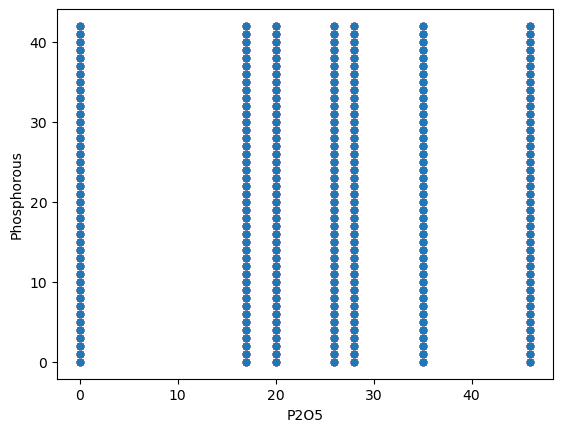

In [11]:
sc = sns.scatterplot(data=data_train, x='P2O5', y='Phosphorous', alpha=0.01)

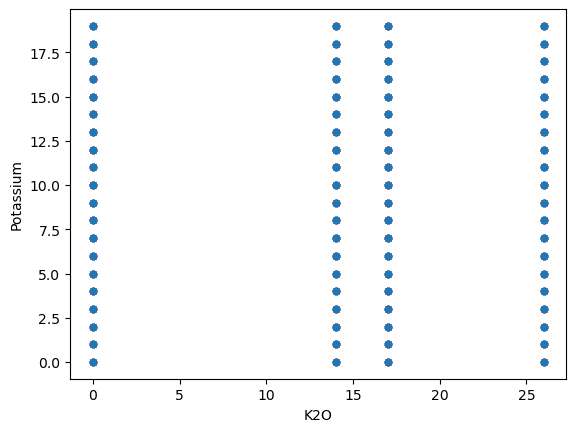

In [12]:
sc = sns.scatterplot(data=data_train, x='K2O', y='Potassium', alpha=0.01)

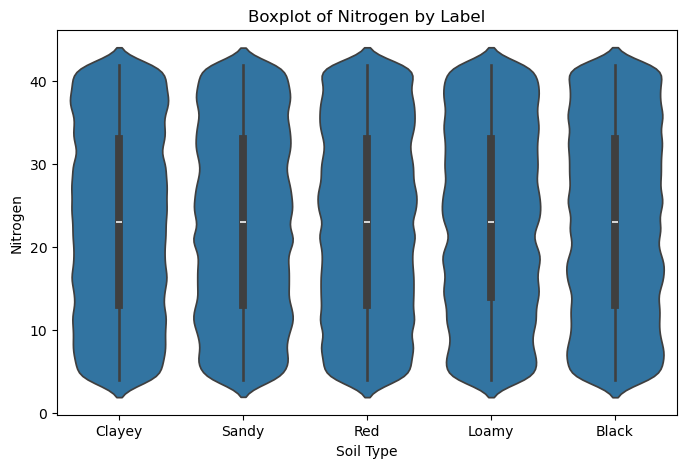

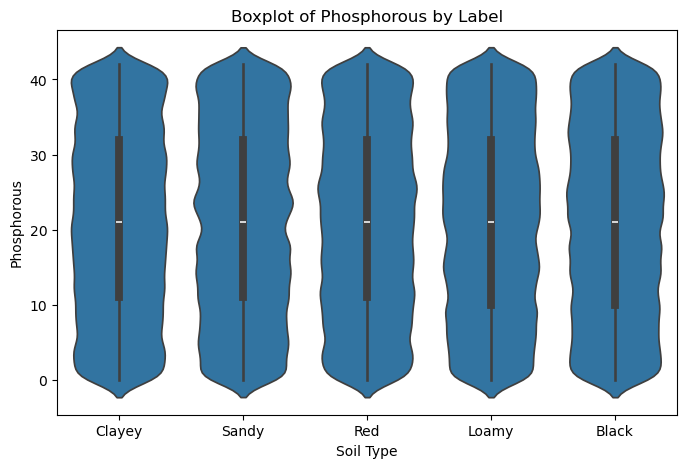

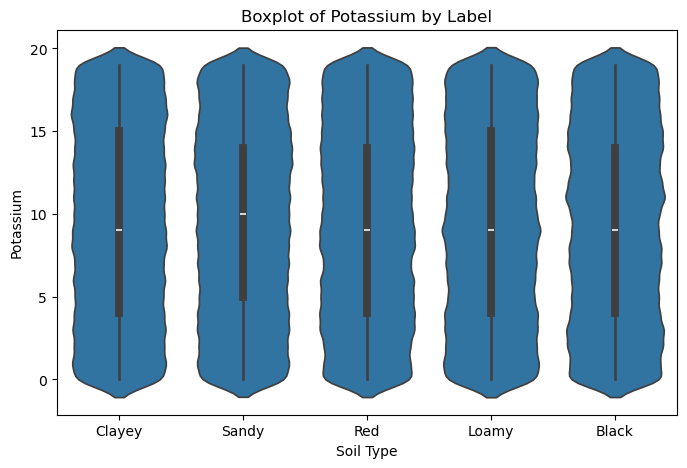

In [16]:
for col in ['Nitrogen', 'Phosphorous', 'Potassium']:
    plt.figure(figsize=(8, 5))
    sns.violinplot(data=data_train, x='Soil Type', y=col)
    plt.title(f'Boxplot of {col} by Label')
    plt.savefig(f"{col}.png", bbox_inches='tight')
    plt.show()